In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('C:\\Users\\Dell\\Downloads\\internship code\\GlobalWeatherRepository.csv')

# 1. Handling Missing Values
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Option 1: Filling missing values with the median (for continuous variables)
# You can modify this to use mean or a different strategy if necessary
for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].median(), inplace=True)

# Option 2: Drop rows with missing values (if applicable)
# data = data.dropna()

# 2. Handling Outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to numeric columns (temperature, humidity, etc.)
continuous_columns = ['temperature_celsius', 'precip_mm', 'humidity', 'wind_mph', 'pressure_mb']

for col in continuous_columns:
    data = remove_outliers(data, col)

# 3. Normalization using MinMaxScaler
scaler = MinMaxScaler()
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

# Save the cleaned and normalized dataset to a new CSV file
data.to_csv('Cleaned_GlobalWeatherRepository.csv', index=False)

print("Data Cleaning and Preprocessing Completed!")


Missing values in each column:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozon

Statistical Summary of the Data:
           latitude     longitude  last_updated_epoch  temperature_celsius   
count  17944.000000  17944.000000        1.794400e+04         17944.000000  \
mean      20.041484     19.803185        1.721309e+09             0.523129   
std       24.080262     62.569012        3.259093e+06             0.194776   
min      -41.300000   -175.200000        1.715849e+09             0.000000   
25%        2.070000     -1.520000        1.718460e+09             0.408935   
50%       18.090000     21.430000        1.721220e+09             0.532646   
75%       41.330000     45.370000        1.724156e+09             0.635739   
max       63.830000    179.220000        1.726830e+09             1.000000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree   
count            17944.000000  17944.000000  17944.000000  17944.000000  \
mean                80.822838      0.310623     13.943379    177.062138   
std                 10.202461      0.22

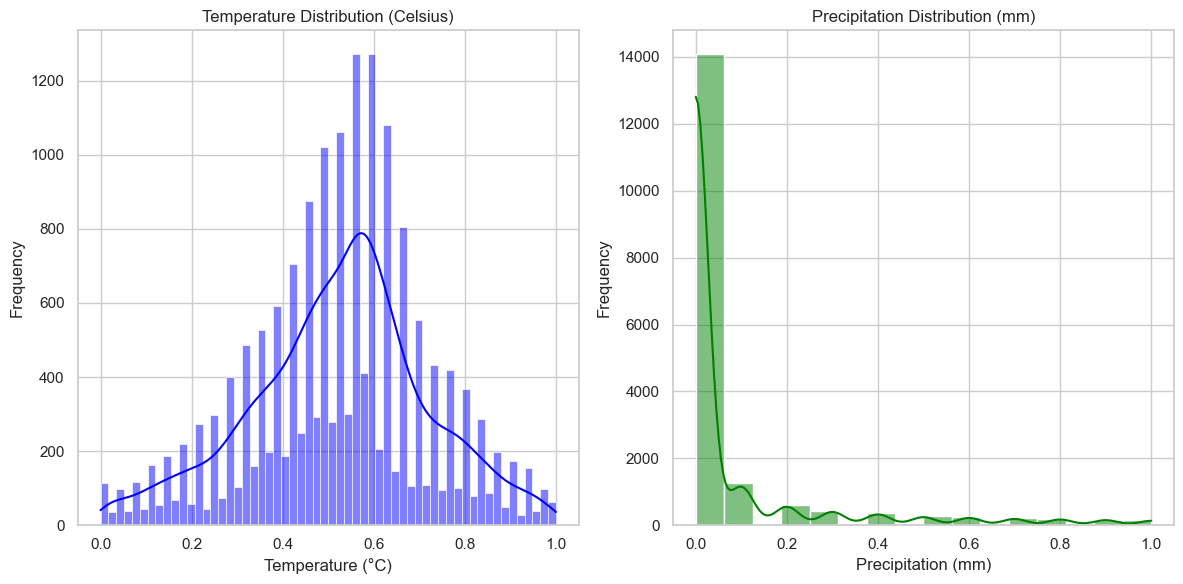

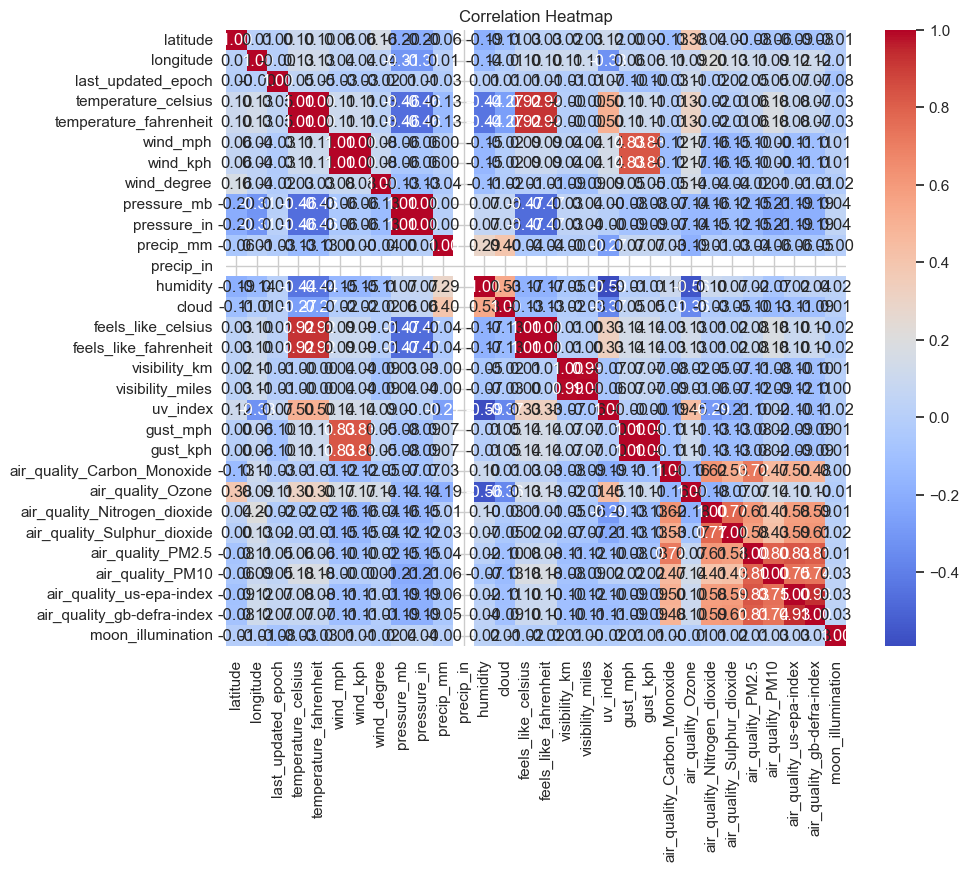

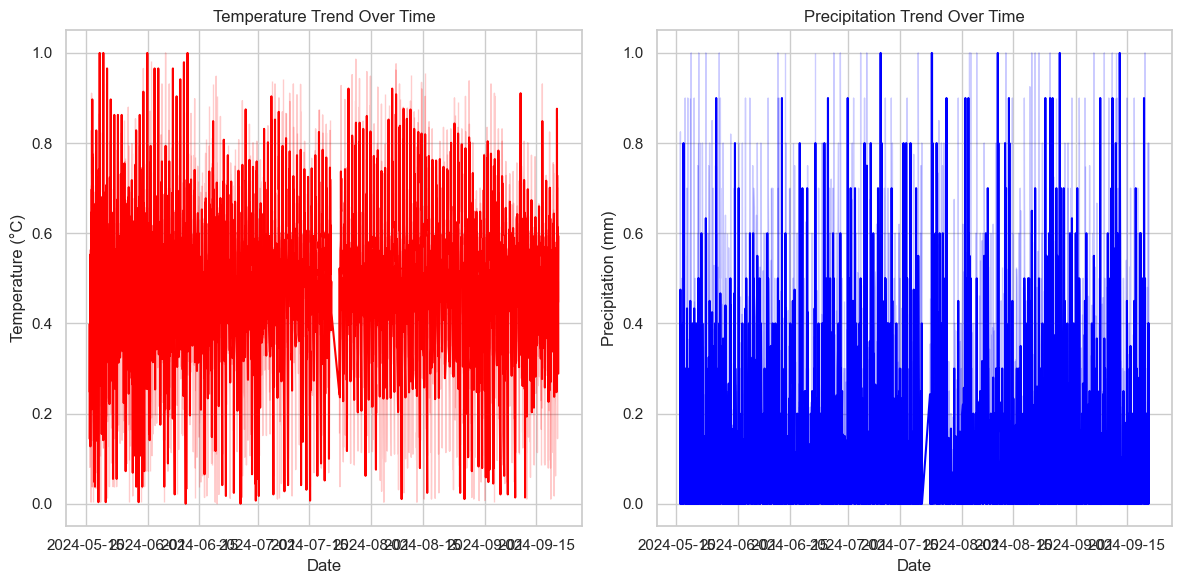

EDA Completed!


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data = pd.read_csv('Cleaned_GlobalWeatherRepository.csv')

# 1. Summary Statistics
print("Statistical Summary of the Data:")
print(data.describe())

# 2. Correlation Matrix (select only numerical columns)
numeric_data = data.select_dtypes(include=[np.number])
print("\nCorrelation Matrix:")
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# 3. Visualizations

# Set Seaborn style for visualizations
sns.set(style="whitegrid")

# 3.1 Distribution of Temperature and Precipitation
plt.figure(figsize=(12, 6))

# Distribution of temperature
plt.subplot(1, 2, 1)
sns.histplot(data['temperature_celsius'], kde=True, color='blue')
plt.title('Temperature Distribution (Celsius)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Distribution of precipitation
plt.subplot(1, 2, 2)
sns.histplot(data['precip_mm'], kde=True, color='green')
plt.title('Precipitation Distribution (mm)')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3.2 Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 3.3 Temperature vs Precipitation Trend Over Time
# Convert 'last_updated' to datetime if not already
data['last_updated'] = pd.to_datetime(data['last_updated'])

plt.figure(figsize=(12, 6))

# Plot temperature over time
plt.subplot(1, 2, 1)
sns.lineplot(x='last_updated', y='temperature_celsius', data=data, color='red')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot precipitation over time
plt.subplot(1, 2, 2)
sns.lineplot(x='last_updated', y='precip_mm', data=data, color='blue')
plt.title('Precipitation Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

plt.tight_layout()
plt.show()

print("EDA Completed!")


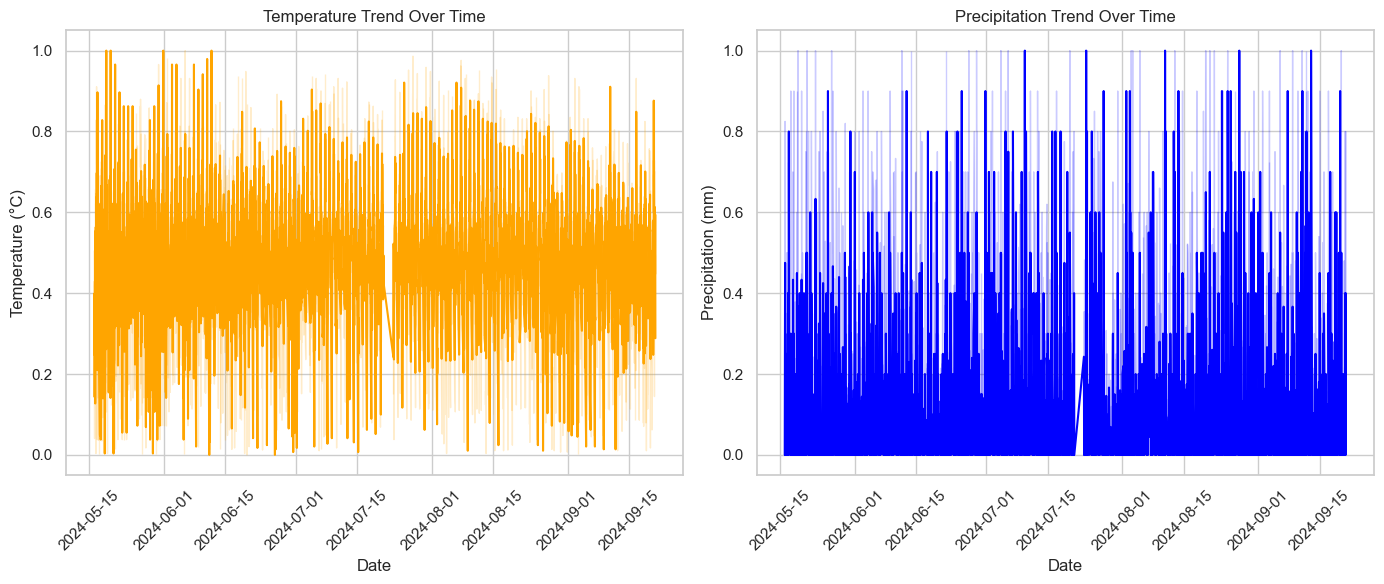

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

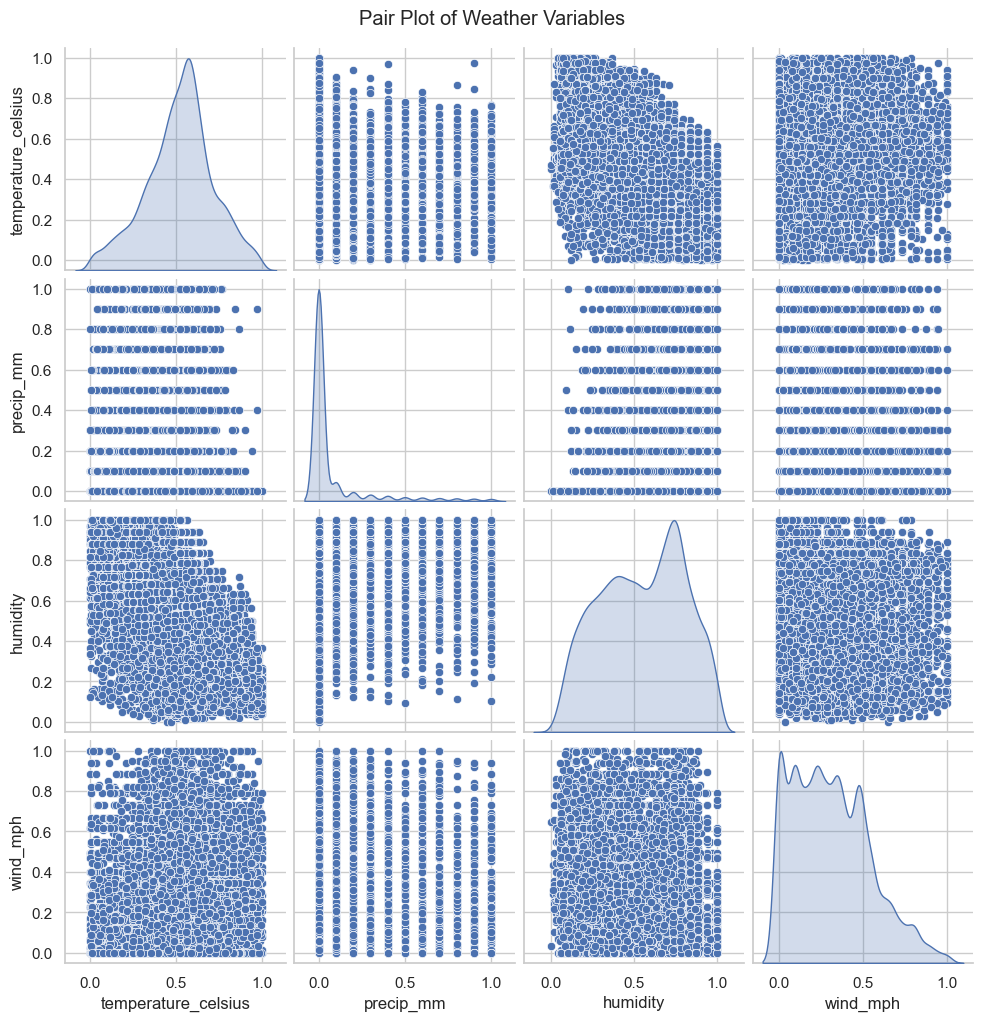

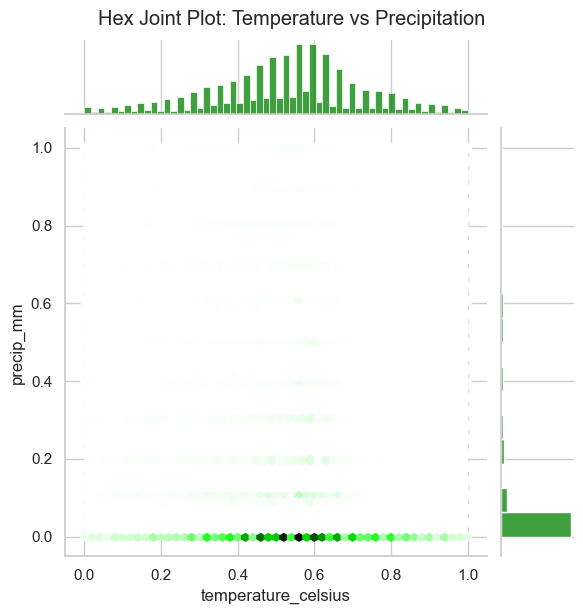

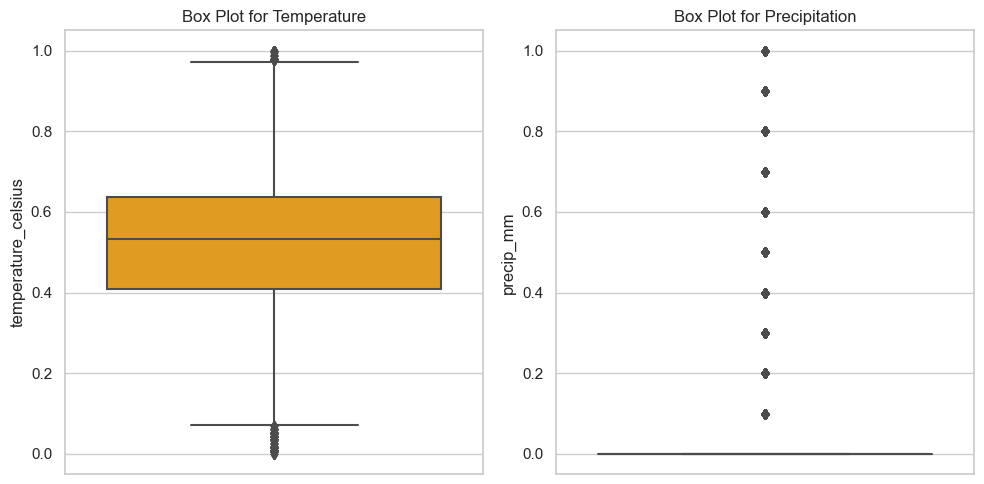

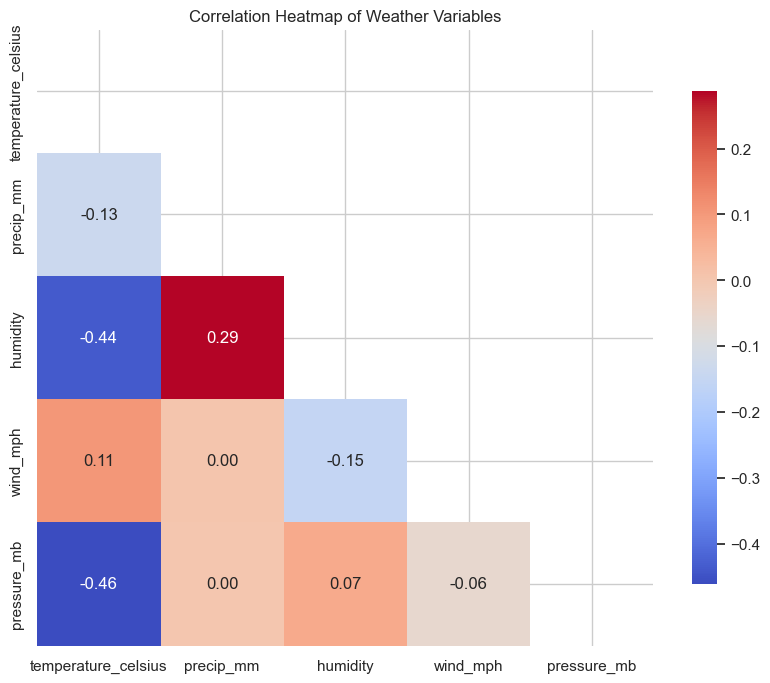

In [4]:
 
# Load the cleaned dataset
data = pd.read_csv('Cleaned_GlobalWeatherRepository.csv')

# Convert 'last_updated' to datetime
data['last_updated'] = pd.to_datetime(data['last_updated'])

# 1. Improved Visualization for Trends
plt.figure(figsize=(14, 6))

# Temperature trend over time
plt.subplot(1, 2, 1)
sns.lineplot(x='last_updated', y='temperature_celsius', data=data, color='orange')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)

# Precipitation trend over time
plt.subplot(1, 2, 2)
sns.lineplot(x='last_updated', y='precip_mm', data=data, color='blue')
plt.title('Precipitation Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. Pair Plot for Correlation and Distribution Visualization
sns.pairplot(data[['temperature_celsius', 'precip_mm', 'humidity', 'wind_mph']], diag_kind='kde', kind='scatter', palette='coolwarm')
plt.suptitle("Pair Plot of Weather Variables", y=1.02)
plt.show()

# 3. Joint Plot for Temperature vs Precipitation Distribution & Correlation
sns.jointplot(x='temperature_celsius', y='precip_mm', data=data, kind='hex', color='green')
plt.suptitle("Hex Joint Plot: Temperature vs Precipitation", y=1.02)
plt.show()

# 4. Box Plot to Detect Outliers in Temperature and Precipitation
plt.figure(figsize=(10, 5))

# Box plot for temperature
plt.subplot(1, 2, 1)
sns.boxplot(y='temperature_celsius', data=data, color='orange')
plt.title('Box Plot for Temperature')

# Box plot for precipitation
plt.subplot(1, 2, 2)
sns.boxplot(y='precip_mm', data=data, color='blue')
plt.title('Box Plot for Precipitation')

plt.tight_layout()
plt.show()

# 5. Improved Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['temperature_celsius', 'precip_mm', 'humidity', 'wind_mph', 'pressure_mb']].corr()

# Use a mask to display only the lower triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Improved heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt='.2f', square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Weather Variables")
plt.show()


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monoto

Temperature (°C) - Mean Absolute Error (MAE): 0.14044614648795206
Temperature (°C) - Root Mean Square Error (RMSE): 0.18773383376528988


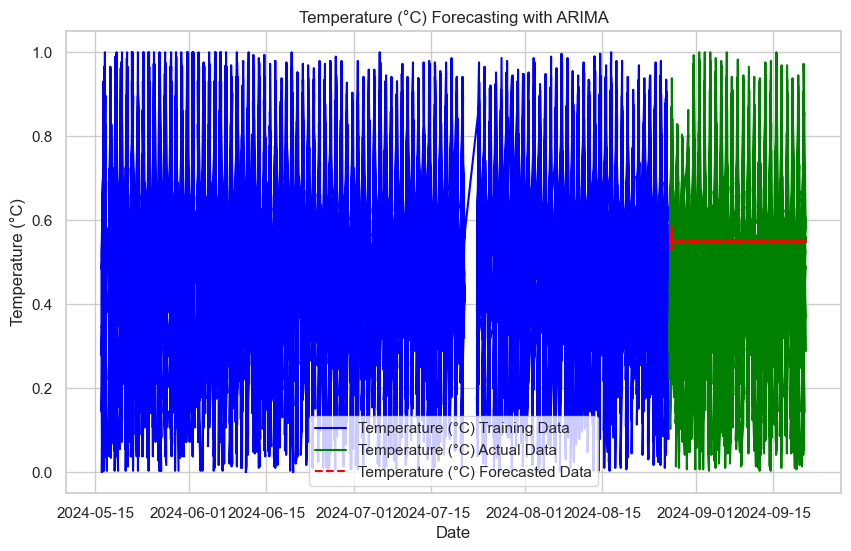

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monoto

Precipitation (mm) - Mean Absolute Error (MAE): 0.1405839243084473
Precipitation (mm) - Root Mean Square Error (RMSE): 0.19027764537183078


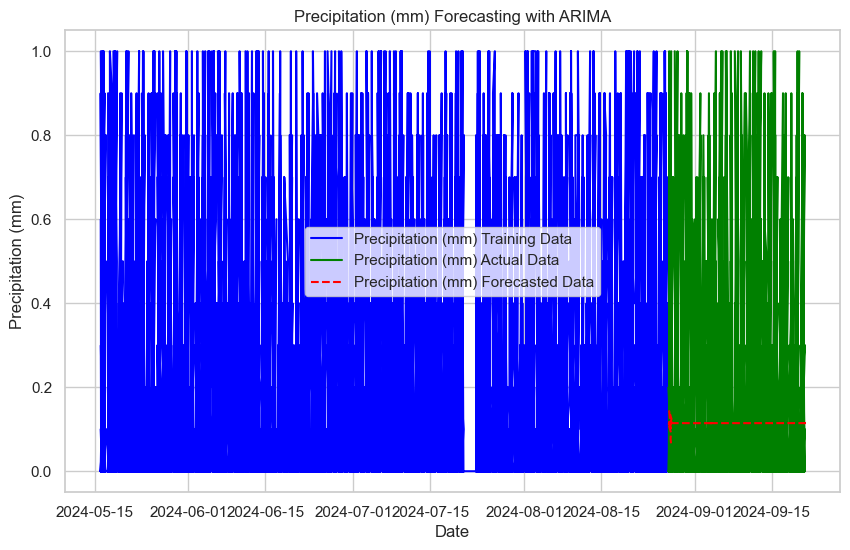

ARIMA models for Temperature and Precipitation have been built, evaluated, and saved!


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the cleaned dataset
data = pd.read_csv('Cleaned_GlobalWeatherRepository.csv')

# 1. Data Preparation
# Convert 'last_updated' to datetime and set it as the index
data['last_updated'] = pd.to_datetime(data['last_updated'])
data.set_index('last_updated', inplace=True)

# 2. Function to forecast and evaluate the model
def forecast_and_evaluate(time_series_data, variable_name, order=(5, 1, 0)):
    # Train-Test Split
    train_size = int(len(time_series_data) * 0.8)
    train_data = time_series_data[:train_size]
    test_data = time_series_data[train_size:]

    # Model Building (ARIMA)
    model = ARIMA(train_data, order=order)  # (p, d, q) parameters can be adjusted
    arima_model = model.fit()

    # Forecasting on the test set
    forecast = arima_model.forecast(steps=len(test_data))

    # Evaluation Metrics
    mae = mean_absolute_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))

    print(f'{variable_name} - Mean Absolute Error (MAE): {mae}')
    print(f'{variable_name} - Root Mean Square Error (RMSE): {rmse}')

    # Plotting the Results
    plt.figure(figsize=(10, 6))

    # Plot training data
    plt.plot(train_data, label=f'{variable_name} Training Data', color='blue')

    # Plot actual data (test set)
    plt.plot(test_data, label=f'{variable_name} Actual Data', color='green')

    # Plot forecasted data
    plt.plot(test_data.index, forecast, label=f'{variable_name} Forecasted Data', color='red', linestyle='--')

    plt.title(f'{variable_name} Forecasting with ARIMA')
    plt.xlabel('Date')
    plt.ylabel(variable_name)
    plt.legend()
    plt.show()

    return arima_model

# 3. Forecast and evaluate temperature
temperature_data = data['temperature_celsius']
arima_temperature_model = forecast_and_evaluate(temperature_data, 'Temperature (°C)', order=(5, 1, 0))

# 4. Forecast and evaluate precipitation
precipitation_data = data['precip_mm']
arima_precipitation_model = forecast_and_evaluate(precipitation_data, 'Precipitation (mm)', order=(5, 1, 0))

# 5. Save the models for future use
import joblib
joblib.dump(arima_temperature_model, 'arima_temp_forecast_model.pkl')
joblib.dump(arima_precipitation_model, 'arima_precipitation_forecast_model.pkl')

print("ARIMA models for Temperature and Precipitation have been built, evaluated, and saved!")
